In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
df_tesla=pdr.get_data_yahoo("TSLA")
df_

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001
...,...,...,...,...,...,...
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020
2022-02-25,819.500000,782.400024,809.229980,809.869995,25355900.0,809.869995


# simple moving average 

<AxesSubplot:xlabel='Date'>

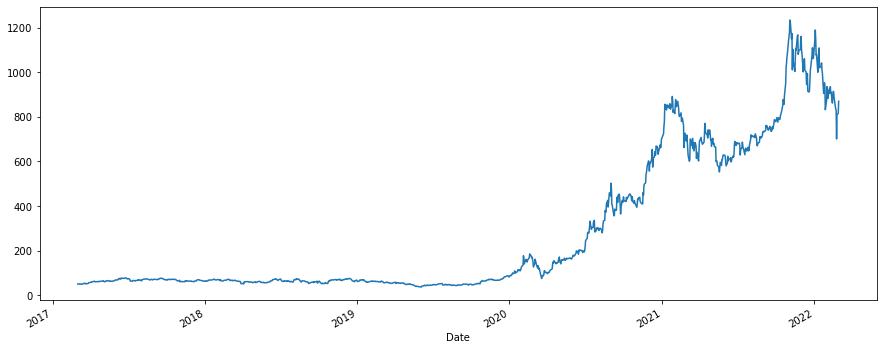

In [4]:
df_tesla["Open"].plot(figsize=(15,6))

In [5]:
#min period parameter in rolling forecast means the how many starting points for rolling widow willbe nan
df_tesla['open_10day']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

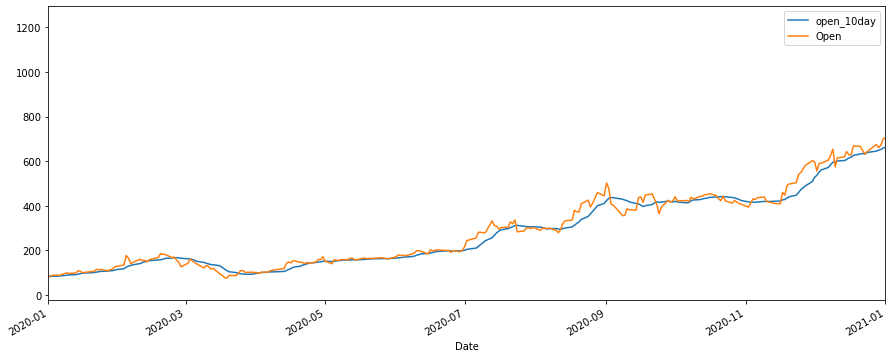

In [9]:
df_tesla[['open_10day','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [12]:
df_tesla['open_20day']=df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['open_30day']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['open_40day']=df_tesla['Open'].rolling(window=40,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

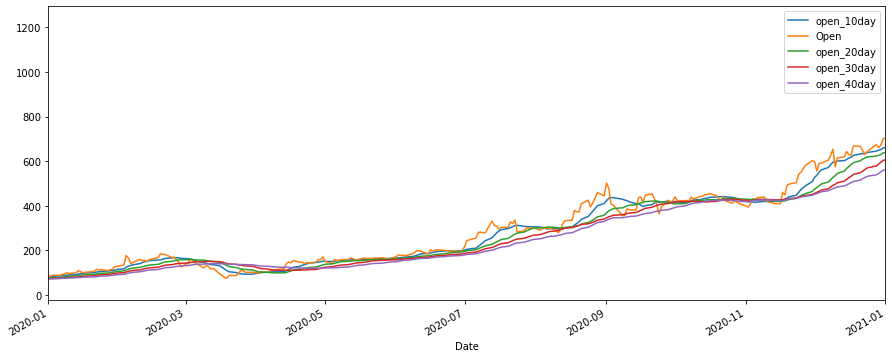

In [13]:
df_tesla[['open_10day','Open','open_20day','open_30day','open_40day']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

Disadvantage of simple MA-
1.giving similar importance to all data (x1+x2+x3)/n in time series we want to give more importance to recent data


<AxesSubplot:xlabel='Date'>

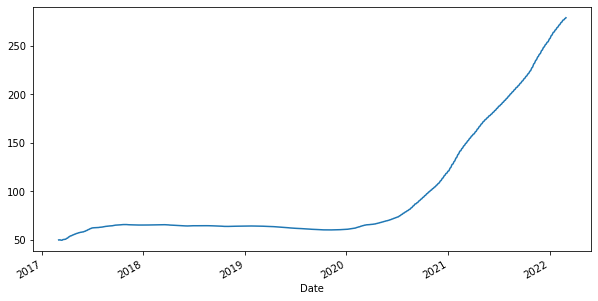

In [14]:
##expanding

df_tesla["Open"].expanding().mean().plot(figsize=(10,5))

# cumulative MA

# Exponential MA

In [15]:
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()##alpha is the smoothening factor

<AxesSubplot:xlabel='Date'>

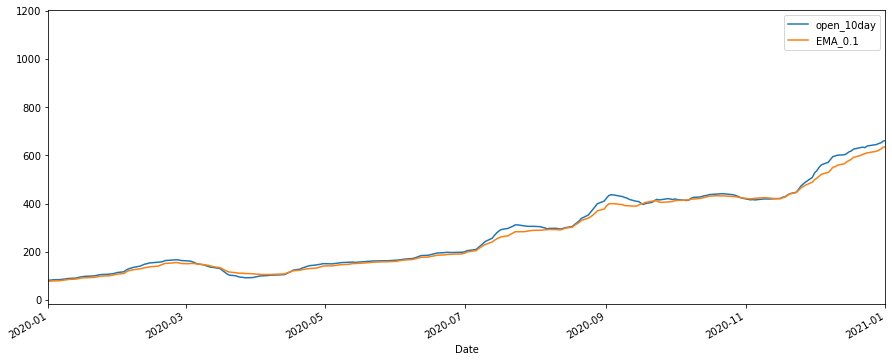

In [16]:
df_tesla[['open_10day','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [ ]:
EWMA

In [18]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5).mean()##to give multiplier effect make it as EWMA

<AxesSubplot:xlabel='Date'>

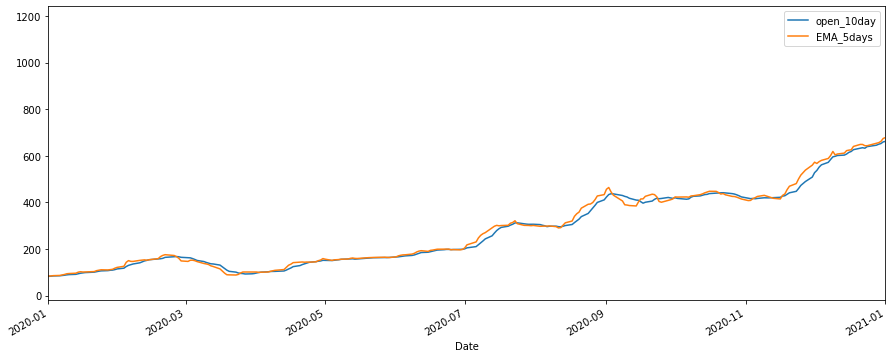

In [19]:
df_tesla[['open_10day','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

# ARIMA